In [1]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('Bangalore.csv')

In [9]:
def converter(x):
    if x=='Jan':
        return 1
    if x=='Feb':
        return 2
    if x=='Mar':
        return 3
    if x=='Apr':
        return 4
    if x=='May':
        return 5
    if x=='Jun':
        return 6
    if x=='Jul':
        return 7
    if x=='Aug':
        return 8
    if x=='Sep':
        return 9
    if x=='Oct':
        return 10
    if x=='Nov':
        return 11
    if x=='Dec':
        return 12

In [12]:
df['month']=df['month'].apply(converter)

In [65]:
df.head()

,year,month,temp,vapour pressure,PET(Potential Evapo-Transpiration),rainfall
0,1975,1,21.88,24.44,5.85,0.00
1,1975,2,24.95,25.07,6.63,3.91
2,1975,3,26.81,25.11,7.43,11.14
3,1975,4,28.67,34.80,7.64,27.28
4,1975,5,27.05,46.93,7.24,124.76


In [67]:
df1=df.groupby('year')

In [68]:
df1.head(20)

,year,month,temp,vapour pressure,PET(Potential Evapo-Transpiration),rainfall
0,1975,1,21.88,24.44,5.85,0.00
1,1975,2,24.95,25.07,6.63,3.91
2,1975,3,26.81,25.11,7.43,11.14
3,1975,4,28.67,34.80,7.64,27.28
4,1975,5,27.05,46.93,7.24,124.76
5,1975,6,24.51,74.67,5.79,83.67
6,1975,7,23.51,80.74,5.30,190.65
7,1975,8,23.83,75.44,5.41,101.71
8,1975,9,23.72,67.12,5.67,135.09
9,1975,10,23.47,64.32,5.29,188.77


# graphs

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df.columns

Index(['year', 'month', 'temp', 'vapour pressure',
       'PET(Potential Evapo-Transpiration)', 'rainfall'],
      dtype='object')

In [15]:
X=df.drop('rainfall',axis=1)

In [18]:
y=df['rainfall']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# using decision tree regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
treg=DecisionTreeRegressor()

In [22]:
treg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
pred=treg.predict(X_test)

In [26]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))

MAE: 27.15405940594059


In [29]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 48.05872770799172


# using random tree regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rfcreg=RandomForestRegressor(n_estimators=3)

In [58]:
rfcreg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
rfcpred=rfcreg.predict(X_test)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, rfcpred))

MAE: 34.13990099009901


In [61]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 92.50427822592322


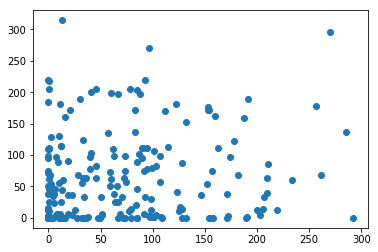

In [72]:
plt.scatter(y_test,pred)
